<a href="https://colab.research.google.com/github/ImannBrar/A3-Comp/blob/main/W2026/Assignments/A1/SYSC4415_W26_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/emslaboratory/SYSC4415/blob/master/W2026/Assignments/A1/SYSC4415_W26_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [1]:
# Name: Imann Brar
# Student Number: 101225891

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [3]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""

# Analytical derivation of partial derivatives:
# f(x,y,z) = e^(x²) + y^y + e^(xy) + z·cos(x)

print("=== Partial Derivative Formulas ===")
print("f(x,y,z) = e^(x²) + y^y + e^(xy) + z·cos(x)")
print()
print("∂f/∂x = 2x·e^(x²) + y·e^(xy) − z·sin(x)")
print("∂f/∂y = y^y·(ln(y) + 1) + x·e^(xy)")
print("∂f/∂z = cos(x)")

print()
print("=== Evaluation at point (0, 1, 1) ===")
print()

# ∂f/∂x at (0,1,1):
# = 2(0)·e^(0) + (1)·e^(0·1) − (1)·sin(0)
# = 0 + 1 − 0 = 1
print(f"∂f/∂x = 2(0)·e^0 + 1·e^0 − 1·sin(0) = 0 + 1 − 0 = 1.0")

# ∂f/∂y at (0,1,1):
# = 1^1·(ln(1) + 1) + 0·e^(0)
# = 1·(0 + 1) + 0 = 1
print(f"∂f/∂y = 1^1·(ln(1) + 1) + 0·e^0 = 1·(0 + 1) + 0 = 1.0")

# ∂f/∂z at (0,1,1):
# = cos(0) = 1
print(f"∂f/∂z = cos(0) = 1.0")

print()
print(f"∇f(0, 1, 1) = [1.0, 1.0, 1.0]")


=== Partial Derivative Formulas ===
f(x,y,z) = e^(x²) + y^y + e^(xy) + z·cos(x)

∂f/∂x = 2x·e^(x²) + y·e^(xy) − z·sin(x)
∂f/∂y = y^y·(ln(y) + 1) + x·e^(xy)
∂f/∂z = cos(x)

=== Evaluation at point (0, 1, 1) ===

∂f/∂x = 2(0)·e^0 + 1·e^0 − 1·sin(0) = 0 + 1 − 0 = 1.0
∂f/∂y = 1^1·(ln(1) + 1) + 0·e^0 = 1·(0 + 1) + 0 = 1.0
∂f/∂z = cos(0) = 1.0

∇f(0, 1, 1) = [1.0, 1.0, 1.0]


In [4]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general

"""

print("""=== Geometric Interpretation of the Gradient ===

1. ∂f/∂x = 1.0
   This partial derivative represents the rate of change of f in the x-direction
   while y and z are held fixed. A value of 1 means that an infinitesimal step
   in the positive x-direction increases f at a rate of 1 unit per unit distance.
   The contributing terms (y·e^(xy)) dominate at this point since the other terms
   vanish at x = 0.

2. ∂f/∂y = 1.0
   This is the rate of change of f in the y-direction with x and z fixed.
   The value of 1 comes entirely from the y^y term, since x = 0 zeroes out the
   e^(xy) contribution. The y^y function at y = 1 has slope (ln(1) + 1) = 1,
   so f increases at 1 unit per unit step in the y-direction.

3. ∂f/∂z = 1.0
   This is the rate of change in the z-direction. It equals cos(x) = cos(0) = 1,
   meaning f increases linearly with z at this point. This makes sense since z
   appears linearly in z·cos(x), and cos(0) = 1.

=== Conclusion ===
The gradient vector ∇f = (1, 1, 1) points in the direction of steepest ascent
of f at the point (0, 1, 1). Since all three components are equal, the steepest
ascent direction is equally weighted across all three axes — it points along the
diagonal (1, 1, 1) in 3D space. The magnitude of the gradient is √(1² + 1² + 1²) = √3 ≈ 1.732,
which gives the maximum rate of increase of f in any direction at this point.
""")


=== Geometric Interpretation of the Gradient ===

1. ∂f/∂x = 1.0
   This partial derivative represents the rate of change of f in the x-direction
   while y and z are held fixed. A value of 1 means that an infinitesimal step
   in the positive x-direction increases f at a rate of 1 unit per unit distance.
   The contributing terms (y·e^(xy)) dominate at this point since the other terms
   vanish at x = 0.

2. ∂f/∂y = 1.0
   This is the rate of change of f in the y-direction with x and z fixed.
   The value of 1 comes entirely from the y^y term, since x = 0 zeroes out the
   e^(xy) contribution. The y^y function at y = 1 has slope (ln(1) + 1) = 1,
   so f increases at 1 unit per unit step in the y-direction.

3. ∂f/∂z = 1.0
   This is the rate of change in the z-direction. It equals cos(x) = cos(0) = 1,
   meaning f increases linearly with z at this point. This makes sense since z
   appears linearly in z·cos(x), and cos(0) = 1.

=== Conclusion ===
The gradient vector ∇f = (1, 1, 1) poi

In [5]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

def f(x, y, z):
    """Compute f(x,y,z) = e^(x^2) + y^y + e^(xy) + z*cos(x)"""
    return np.exp(x**2) + y**y + np.exp(x * y) + z * np.cos(x)

def numerical_gradient(func, x, y, z, h=1e-7):
    """Approximate the gradient using the central difference method."""
    df_dx = (func(x + h, y, z) - func(x - h, y, z)) / (2 * h)
    df_dy = (func(x, y + h, z) - func(x, y - h, z)) / (2 * h)
    df_dz = (func(x, y, z + h) - func(x, y, z - h)) / (2 * h)
    return np.array([df_dx, df_dy, df_dz])

# Point of evaluation
x0, y0, z0 = 0.0, 1.0, 1.0

# Function value at the point
f_val = f(x0, y0, z0)
print(f"f(0, 1, 1) = {f_val}")

# Analytical gradient (from Q1a)
analytical = np.array([1.0, 1.0, 1.0])

# Numerical gradient
numerical = numerical_gradient(f, x0, y0, z0)

print(f"\nAnalytical gradient: {analytical}")
print(f"Numerical gradient:  {numerical}")

# Compare
diff = np.abs(analytical - numerical)
print(f"\nAbsolute differences:")
print(f"  |∂f/∂x_analytical − ∂f/∂x_numerical| = {diff[0]:.2e}")
print(f"  |∂f/∂y_analytical − ∂f/∂y_numerical| = {diff[1]:.2e}")
print(f"  |∂f/∂z_analytical − ∂f/∂z_numerical| = {diff[2]:.2e}")
print(f"\nAll differences are on the order of 1e-10 or smaller, confirming the analytical result.")

f(0, 1, 1) = 4.0

Analytical gradient: [1. 1. 1.]
Numerical gradient:  [1. 1. 1.]

Absolute differences:
  |∂f/∂x_analytical − ∂f/∂x_numerical| = 3.86e-09
  |∂f/∂y_analytical − ∂f/∂y_numerical| = 5.84e-10
  |∂f/∂z_analytical − ∂f/∂z_numerical| = 5.84e-10

All differences are on the order of 1e-10 or smaller, confirming the analytical result.


## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [6]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

# Show it contains valid data
print("=== First 5 Rows ===")
print(penguins.head())
print(f"\nDataset shape: {penguins.shape}")
print(f"Data types:\n{penguins.dtypes}")

# Create variables for numerical features and labels
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
label_column = 'species'

print(f"\nNumerical features: {numerical_features}")
print(f"Label column: {label_column}")

# Basic statistical analysis
print("\n=== Descriptive Statistics ===")
print(penguins.describe())

# Find missing values
print("\n=== Missing Values ===")
print(penguins.isnull().sum())

# Save entries with missing sex before cleaning
missing_sex_data = penguins[penguins['sex'].isnull()].copy()
print(f"\nSaved {len(missing_sex_data)} records with missing 'sex' for later use.")

# Drop all records with any missing values
clean_penguins = penguins.dropna()
print(f"\nOriginal dataset size:  {penguins.shape}")
print(f"Clean dataset size:     {clean_penguins.shape}")
print(f"Rows removed:           {len(penguins) - len(clean_penguins)}")
print(f"\nRemaining missing values: {clean_penguins.isnull().sum().sum()}")


=== First 5 Rows ===
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Dataset shape: (344, 7)
Data types:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Numerical features: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Label column: species

=== Descriptiv

=== Scatterplot Matrix ===


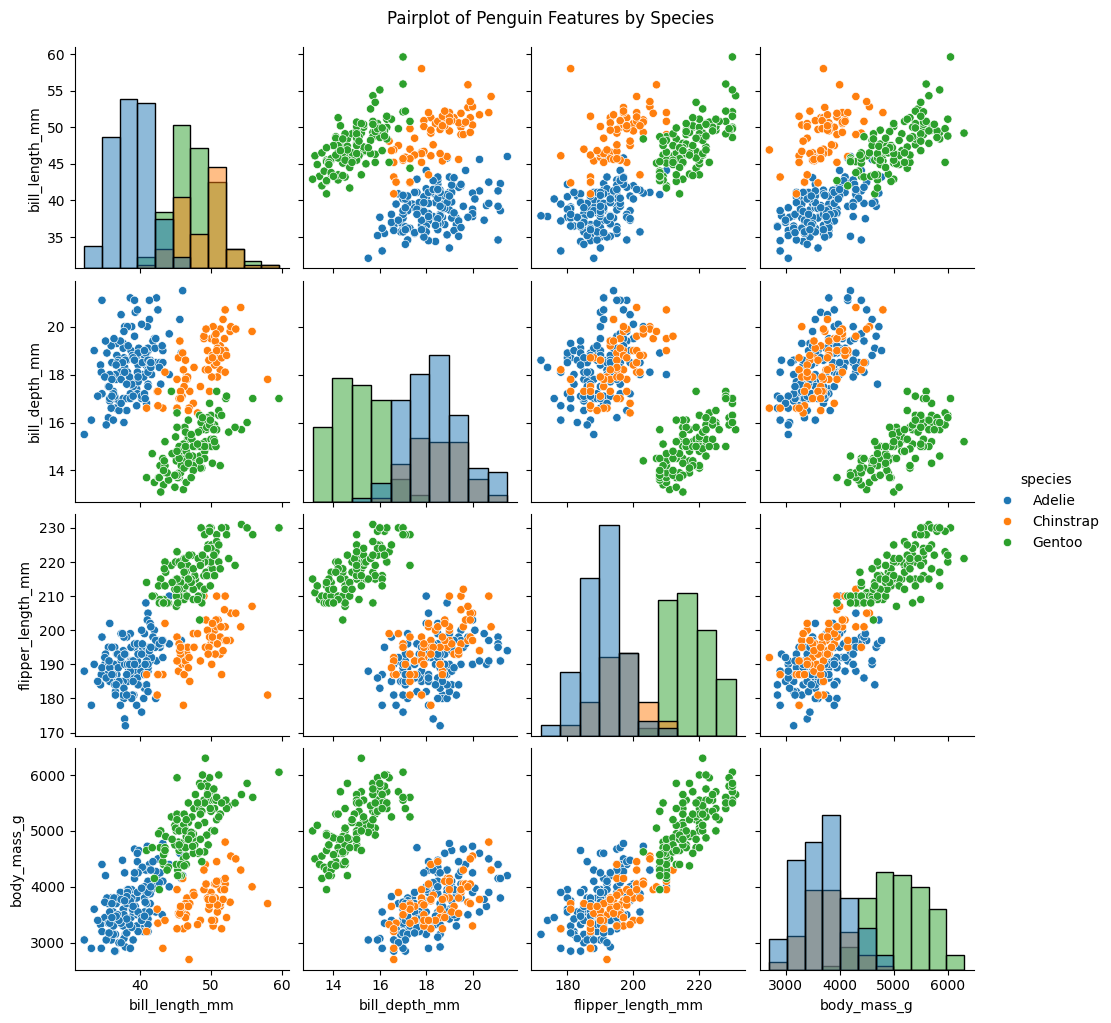


=== Outlier Analysis: flipper_length_mm ===
flipper_length_mm was identified as having outliers visible in the pairplot.
Below we compare the distribution for Adelie vs Gentoo penguins:



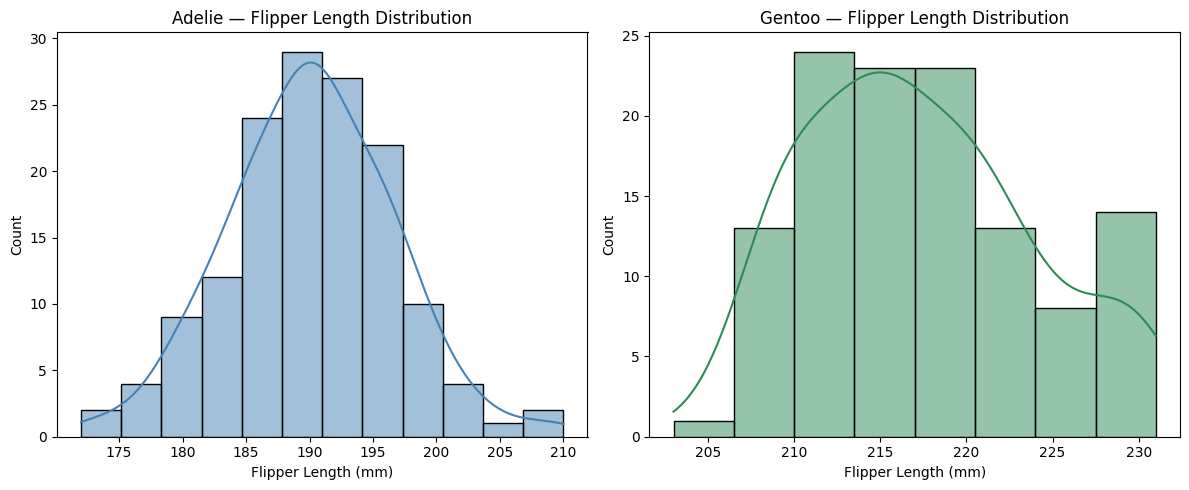

The Adelie distribution is concentrated around 190 mm with a few lower outliers.
The Gentoo distribution is centered around 217 mm with a wider spread and some high outliers.


In [7]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

# 1. Scatterplot matrix (pairplot) colored by species
print("=== Scatterplot Matrix ===")
sb.pairplot(clean_penguins, hue='species', diag_kind='hist')
plt.suptitle("Pairplot of Penguin Features by Species", y=1.02)
plt.show()

# 2. Identify a feature with outliers and show histograms for two classes
# From the pairplot, flipper_length_mm shows some outlier values in the Adelie and Gentoo distributions.
print("\n=== Outlier Analysis: flipper_length_mm ===")
print("flipper_length_mm was identified as having outliers visible in the pairplot.")
print("Below we compare the distribution for Adelie vs Gentoo penguins:\n")

adelie = clean_penguins[clean_penguins['species'] == 'Adelie']
gentoo = clean_penguins[clean_penguins['species'] == 'Gentoo']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram 1: Adelie
sb.histplot(adelie['flipper_length_mm'], kde=True, color='steelblue', ax=axes[0])
axes[0].set_title('Adelie — Flipper Length Distribution')
axes[0].set_xlabel('Flipper Length (mm)')
axes[0].set_ylabel('Count')

# Histogram 2: Gentoo
sb.histplot(gentoo['flipper_length_mm'], kde=True, color='seagreen', ax=axes[1])
axes[1].set_title('Gentoo — Flipper Length Distribution')
axes[1].set_xlabel('Flipper Length (mm)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("The Adelie distribution is concentrated around 190 mm with a few lower outliers.")
print("The Gentoo distribution is centered around 217 mm with a wider spread and some high outliers.")


=== Class Distribution ===
  Adelie: 146 samples (43.8%)
  Gentoo: 119 samples (35.7%)
  Chinstrap: 68 samples (20.4%)


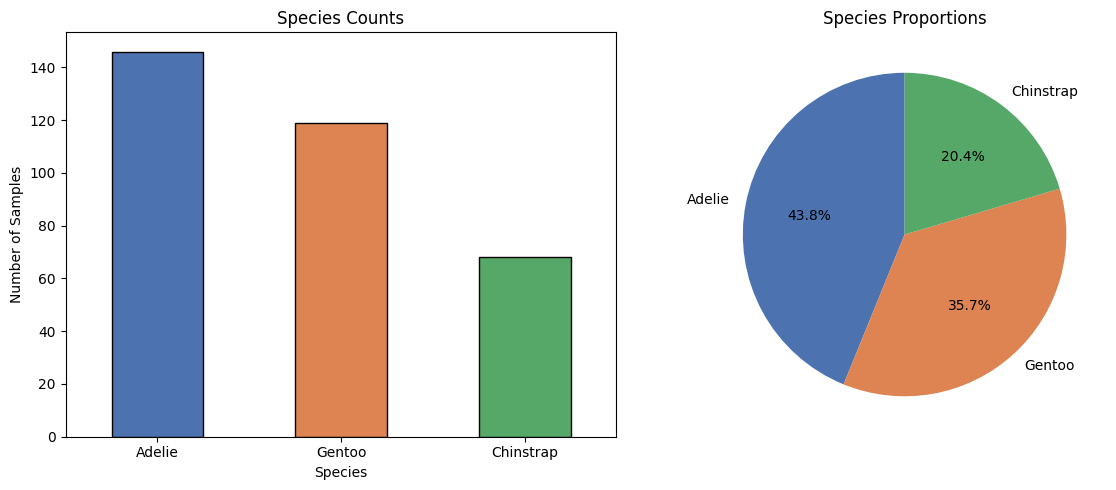


=== Class Imbalance Analysis ===
Majority class: Adelie with 146 samples
Minority class: Chinstrap with 68 samples
Ratio (majority / minority): 2.15

There is a moderate class imbalance. Adelie penguins make up ~44% of the data
while Chinstrap penguins make up only ~20%. This means a model could achieve
decent overall accuracy by being biased toward predicting Adelie, while
underperforming on the minority Chinstrap class. Stratified splitting and
cross-validation can help mitigate this issue during training and evaluation.


In [8]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

# Calculate class proportions
species_counts = clean_penguins['species'].value_counts()
species_proportions = clean_penguins['species'].value_counts(normalize=True) * 100

print("=== Class Distribution ===")
for sp in species_counts.index:
    print(f"  {sp}: {species_counts[sp]} samples ({species_proportions[sp]:.1f}%)")

# Visualize with a bar chart and pie chart
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
species_counts.plot(kind='bar', color=['#4C72B0', '#DD8452', '#55A868'], ax=axes[0], edgecolor='black')
axes[0].set_title('Species Counts')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Number of Samples')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
axes[1].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%',
            colors=['#4C72B0', '#DD8452', '#55A868'], startangle=90)
axes[1].set_title('Species Proportions')

plt.tight_layout()
plt.show()

# Analysis
print(f"\n=== Class Imbalance Analysis ===")
print(f"Majority class: {species_counts.idxmax()} with {species_counts.max()} samples")
print(f"Minority class: {species_counts.idxmin()} with {species_counts.min()} samples")
print(f"Ratio (majority / minority): {species_counts.max() / species_counts.min():.2f}")
print()
print("There is a moderate class imbalance. Adelie penguins make up ~44% of the data")
print("while Chinstrap penguins make up only ~20%. This means a model could achieve")
print("decent overall accuracy by being biased toward predicting Adelie, while")
print("underperforming on the minority Chinstrap class. Stratified splitting and")
print("cross-validation can help mitigate this issue during training and evaluation.")


## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

In [9]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""

# Define features (X) and target (y)
X = clean_penguins[numerical_features]
y = clean_penguins['species']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print first 5 rows of training data with species labels
print("=== First 5 Rows of Training Data ===")
train_preview = pd.concat([X_train, y_train], axis=1)
print(train_preview.head())

# Print shapes
print(f"\n=== Dataset Shapes ===")
print(f"Training set:  X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set:      X_test={X_test.shape},  y_test={y_test.shape}")

# Samples per species in each split
print(f"\n=== Species Distribution in Training Set ===")
print(y_train.value_counts())

print(f"\n=== Species Distribution in Test Set ===")
print(y_test.value_counts())


=== First 5 Rows of Training Data ===
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species
230            40.9           13.7              214.0       4650.0  Gentoo
84             37.3           17.8              191.0       3350.0  Adelie
303            50.0           15.9              224.0       5350.0  Gentoo
22             35.9           19.2              189.0       3800.0  Adelie
29             40.5           18.9              180.0       3950.0  Adelie

=== Dataset Shapes ===
Training set:  X_train=(266, 4), y_train=(266,)
Test set:      X_test=(67, 4),  y_test=(67,)

=== Species Distribution in Training Set ===
species
Adelie       115
Gentoo        96
Chinstrap     55
Name: count, dtype: int64

=== Species Distribution in Test Set ===
species
Adelie       31
Gentoo       23
Chinstrap    13
Name: count, dtype: int64


Training Accuracy: 1.0000
Test Accuracy:     1.0000

=== 10-Fold Cross-Validation ===
Individual fold scores: [0.96296296 0.88888889 0.92592593 0.92592593 1.         0.92592593
 1.         0.92307692 1.         1.        ]
Mean CV Accuracy: 0.9553
Std CV Accuracy:  0.0401


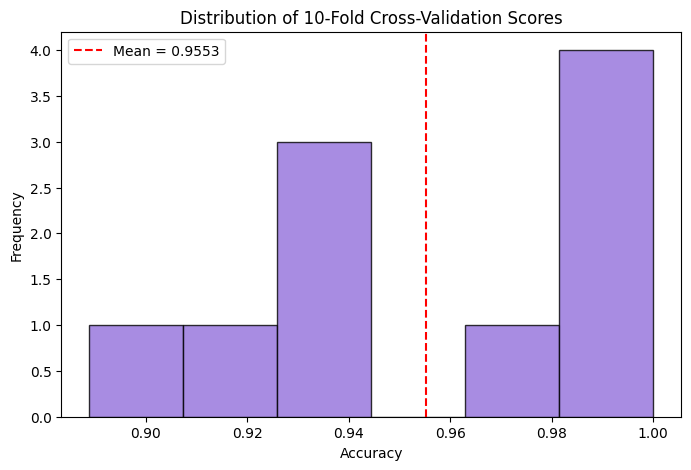


=== Histogram Interpretation ===
The histogram shows the distribution of accuracy scores across the 10 folds.
Most scores cluster near the mean, indicating the model performs consistently.
A narrow spread (low std) suggests stable performance across different data splits.
If the training accuracy is significantly higher than the CV mean, this indicates
some overfitting, which is typical for default (unrestricted) decision trees.


In [10]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score

# 1. Create and train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Training and test accuracy
train_accuracy = dt_model.score(X_train, y_train)
test_accuracy = dt_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")

# 3. 10-fold cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10)

print(f"\n=== 10-Fold Cross-Validation ===")
print(f"Individual fold scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Std CV Accuracy:  {cv_scores.std():.4f}")

# 4. Histogram of CV scores
plt.figure(figsize=(8, 5))
plt.hist(cv_scores, bins=6, color='mediumpurple', edgecolor='black', alpha=0.8)
plt.axvline(cv_scores.mean(), color='red', linestyle='--', label=f'Mean = {cv_scores.mean():.4f}')
plt.title('Distribution of 10-Fold Cross-Validation Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 5. Interpretation
print("\n=== Histogram Interpretation ===")
print("The histogram shows the distribution of accuracy scores across the 10 folds.")
print("Most scores cluster near the mean, indicating the model performs consistently.")
print("A narrow spread (low std) suggests stable performance across different data splits.")
print("If the training accuracy is significantly higher than the CV mean, this indicates")
print("some overfitting, which is typical for default (unrestricted) decision trees.")


Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best CV Score:   0.9510


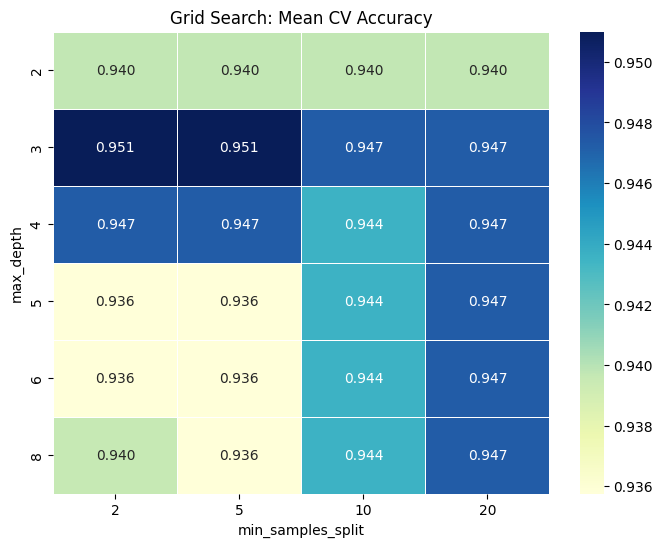


=== Best Decision Tree Visualization (max_depth=2 for display) ===


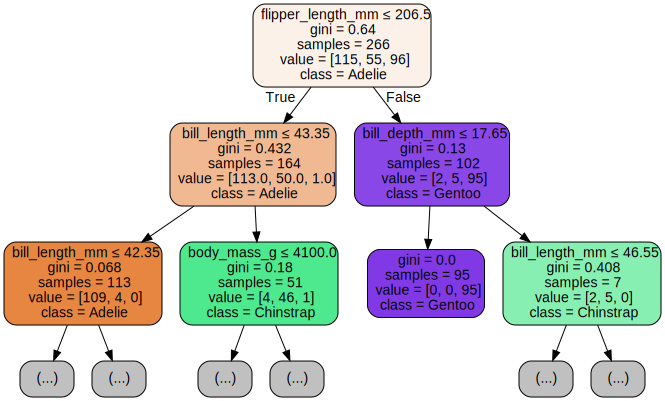

In [11]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn.tree import export_graphviz
from graphviz import Source

# 1. Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, None],
    'min_samples_split': [2, 5, 10, 20]
}

# 2. Set up StratifiedKFold cross-validation
cv_stratified = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 3. Run GridSearchCV
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=cv_stratified,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score:   {grid_search.best_score_:.4f}")

# 4. Heatmap of grid search results
results = pd.DataFrame(grid_search.cv_results_)
heatmap_data = results.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_min_samples_split'
)

plt.figure(figsize=(8, 6))
sb.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlGnBu', linewidths=0.5)
plt.title('Grid Search: Mean CV Accuracy')
plt.ylabel('max_depth')
plt.xlabel('min_samples_split')
plt.show()

# 5. Visualize the best decision tree (max_depth=2 for readability)
print("\n=== Best Decision Tree Visualization (max_depth=2 for display) ===")
best_tree = grid_search.best_estimator_

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=numerical_features,
    class_names=best_tree.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
    max_depth=2
)

graph = Source(dot_data)
display(graph)


## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [12]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""

# Prepare features including species as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 1. Prepare dataset — work on a copy to avoid modifying clean_penguins
df_sex = clean_penguins.copy()

# Encode species as numeric using LabelEncoder
le = LabelEncoder()
df_sex['species'] = le.fit_transform(df_sex['species'])
print(f"Species encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# 2. Feature/label split — use sex as the target
feature_cols_sex = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']
X_sex = df_sex[feature_cols_sex]
y_sex = df_sex['sex']

# 3. Scale features
scaler = StandardScaler()
X_sex_scaled = scaler.fit_transform(X_sex)

# 4. Train/test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_sex_scaled, y_sex, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train_s.shape}, Test set: {X_test_s.shape}")

# 5. Define and train classifiers
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=200),
    "Decision Tree":       DecisionTreeClassifier(max_depth=3, random_state=42),
    "KNN (k=5)":           KNeighborsClassifier(n_neighbors=5),
    "SVM (linear)":        SVC(kernel="linear", C=0.025, probability=True)
}

# 6. Evaluate all models
print(f"\n{'Model':<22} {'Train Acc':<12} {'Test Acc':<12} {'CV Mean':<12} {'CV Std':<10}")
print("-" * 68)

best_model_name = ""
best_test_acc = 0

for name, model in models.items():
    model.fit(X_train_s, y_train_s)

    train_acc = model.score(X_train_s, y_train_s)
    test_acc = model.score(X_test_s, y_test_s)
    cv = cross_val_score(model, X_train_s, y_train_s, cv=10)

    print(f"{name:<22} {train_acc:<12.4f} {test_acc:<12.4f} {cv.mean():<12.4f} {cv.std():<10.4f}")

    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_model_name = name

print(f"\nBest model by test accuracy: {best_model_name} ({best_test_acc:.4f})")


Species encoding: {'Adelie': np.int64(0), 'Chinstrap': np.int64(1), 'Gentoo': np.int64(2)}

Training set: (266, 5), Test set: (67, 5)

Model                  Train Acc    Test Acc     CV Mean      CV Std    
--------------------------------------------------------------------
Logistic Regression    0.9098       0.8955       0.9023       0.0695    
Decision Tree          0.9286       0.8358       0.8984       0.0675    
KNN (k=5)              0.9511       0.8806       0.9248       0.0580    
SVM (linear)           0.9023       0.8955       0.9021       0.0632    

Best model by test accuracy: Logistic Regression (0.8955)


In [13]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""

# 1. Copy the missing sex records saved in Q2a
inference_data = missing_sex_data.copy()

print("=== Records with Missing Sex Values ===")
print(inference_data)
print(f"\nTotal records with missing sex: {len(inference_data)}")

# 2. Drop records that have missing values for features other than sex
inference_data.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)
print(f"Records remaining after dropping rows with other missing features: {len(inference_data)}")

# 3. Encode species using the same LabelEncoder from Q4a
inference_data['species'] = le.transform(inference_data['species'])

# 4. Create features and scale using the same scaler from Q4a
X_infer = inference_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']]
X_infer_scaled = scaler.transform(X_infer)

# 5. Select the best model from Q4a and predict
best_model = models[best_model_name]

predictions = best_model.predict(X_infer_scaled)
probabilities = best_model.predict_proba(X_infer_scaled)

print(f"\n=== Predictions using {best_model_name} ===")
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    confidence = max(prob) * 100
    print(f"  Record {i+1}: Predicted \'{pred}\' with {confidence:.1f}% confidence")

# 6. Fill in the missing sex values
inference_data['sex'] = predictions

# Convert species back to original labels
inference_data['species'] = le.inverse_transform(inference_data['species'])

# 7. Merge imputed records with the clean dataset
final_dataset = pd.concat([clean_penguins, inference_data])

print(f"\n=== Final Dataset Status ===")
print(f"Original clean dataset size: {len(clean_penguins)}")
print(f"Imputed records added:       {len(inference_data)}")
print(f"Final dataset size:          {len(final_dataset)}")
print(f"Total missing values:        {final_dataset.isnull().sum().sum()}")


=== Records with Missing Sex Values ===
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [14]:
# Provide your Signarure:
%load_ext watermark
%watermark -a 'Imann Brar, #101225891' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

ModuleNotFoundError: No module named 'watermark'